<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/skhabiri_LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://github.com/skhabiri/PredictiveModeling-LinearModels-u2s1/tree/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [2]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [3]:
df.tail()

bathrooms  bedrooms              created  \
49347        1.0         2  2016-06-02 05:41:05   
49348        1.0         1  2016-04-04 18:22:34   
49349        1.0         1  2016-04-16 02:13:40   
49350        1.0         0  2016-04-08 02:13:33   
49351        1.0         2  2016-04-12 02:48:07   

                                             description    display_address  \
49347  30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...            E 30 St   
49348  HIGH END condo finishes, swimming pool, and ki...          Rector Pl   
49349  Large Renovated One Bedroom Apartment with Sta...   West 45th Street   
49350  Stylishly sleek studio apartment with unsurpas...        Wall Street   
49351  Look no further!!!  This giant 2 bedroom apart...  Park Terrace East   

       latitude  longitude  price        street_address interest_level  ...  \
49347   40.7426   -73.9790   3200           230 E 30 St         medium  ...   
49348   40.7102   -74.0163   3950      225 Rector Place            low  ...   
49349   40.7601   -73.9900   2595  341 West 45th Street            low  ...   
49350   40.7066   -74.0101   3350        37 Wall Street            low  ...   
49351   40.8699   -73.9172   2200  30 Park Terrace East            low  ...   

       high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
49347                    0        0              0                 0        0   
49348                    0        0              0                 0        0   
49349                    0        0              0                 0        0   
49350                    0        0              0                 0        0   
49351                    0        0              0                 0        0   

       exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
49347          0     0             0                  0                     0  
49348          1     0             0                  0                     1  
49349          0     0             0                  0                     0  
49350          0     0             0                  0                     0  
49351          0     0             0                  0                     0  

[5 rows x 34 columns]

In [4]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             49352 non-null  float64
 1   bedrooms              49352 non-null  int64  
 2   created               49352 non-null  object 
 3   description           47906 non-null  object 
 4   display_address       49217 non-null  object 
 5   latitude              49352 non-null  float64
 6   longitude             49352 non-null  float64
 7   price                 49352 non-null  int64  
 8   street_address        49342 non-null  object 
 9   interest_level        49352 non-null  object 
 10  elevator              49352 non-null  int64  
 11  cats_allowed          49352 non-null  int64  
 12  hardwood_floors       49352 non-null  int64  
 13  dogs_allowed          49352 non-null  int64  
 14  doorman               49352 non-null  int64  
 15  dishwasher         

In [6]:
df.describe()

bathrooms      bedrooms      latitude     longitude         price  \
count  49352.00000  49352.000000  49352.000000  49352.000000  4.935200e+04   
mean       1.21218      1.541640     40.741545    -73.955716  3.830174e+03   
std        0.50142      1.115018      0.638535      1.177912  2.206687e+04   
min        0.00000      0.000000      0.000000   -118.271000  4.300000e+01   
25%        1.00000      1.000000     40.728300    -73.991700  2.500000e+03   
50%        1.00000      1.000000     40.751800    -73.977900  3.150000e+03   
75%        1.00000      2.000000     40.774300    -73.954800  4.100000e+03   
max       10.00000      8.000000     44.883500      0.000000  4.490000e+06   

           elevator  cats_allowed  hardwood_floors  dogs_allowed  \
count  49352.000000  49352.000000     49352.000000  49352.000000   
mean       0.525126      0.476982         0.476759      0.446486   
std        0.499373      0.499475         0.499465      0.497133   
min        0.000000      0.000000         0.000000      0.000000   
25%        0.000000      0.000000         0.000000      0.000000   
50%        1.000000      0.000000         0.000000      0.000000   
75%        1.000000      1.000000         1.000000      1.000000   
max        1.000000      1.000000         1.000000      1.000000   

            doorman  ...  high_speed_internet       balcony  swimming_pool  \
count  49352.000000  ...         49352.000000  49352.000000   49352.000000   
mean       0.424887  ...             0.087190      0.060686       0.055357   
std        0.494331  ...             0.282116      0.238757       0.228679   
min        0.000000  ...             0.000000      0.000000       0.000000   
25%        0.000000  ...             0.000000      0.000000       0.000000   
50%        0.000000  ...             0.000000      0.000000       0.000000   
75%        1.000000  ...             0.000000      0.000000       0.000000   
max        1.000000  ...             1.000000      1.000000       1.000000   

       new_construction       terrace     exclusive          loft  \
count      49352.000000  49352.000000  49352.000000  49352.000000   
mean           0.051852      0.046847      0.043929      0.042612   
std            0.221730      0.211313      0.204940      0.201983   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.000000   
50%            0.000000      0.000000      0.000000      0.000000   
75%            0.000000      0.000000      0.000000      0.000000   
max            1.000000      1.000000      1.000000      1.000000   

       garden_patio  wheelchair_access  common_outdoor_space  
count  49352.000000       49352.000000           49352.00000  
mean       0.039370           0.027517               0.02620  
std        0.194476           0.163585               0.15973  
min        0.000000           0.000000               0.00000  
25%        0.000000           0.000000               0.00000  
50%        0.000000           0.000000               0.00000  
75%        0.000000           0.000000               0.00000  
max        1.000000           1.000000               1.00000  

[8 rows x 29 columns]

In [7]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [8]:
df.shape

(48818, 34)

In [9]:
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Baseline metric

In [10]:
rent_mean = df['price'].mean()
rent_mean

3579.5609816051456

<AxesSubplot:ylabel='Frequency'>

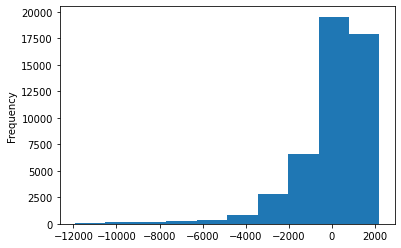

In [12]:
errors = rent_mean - df['price']
errors.plot(kind='hist')

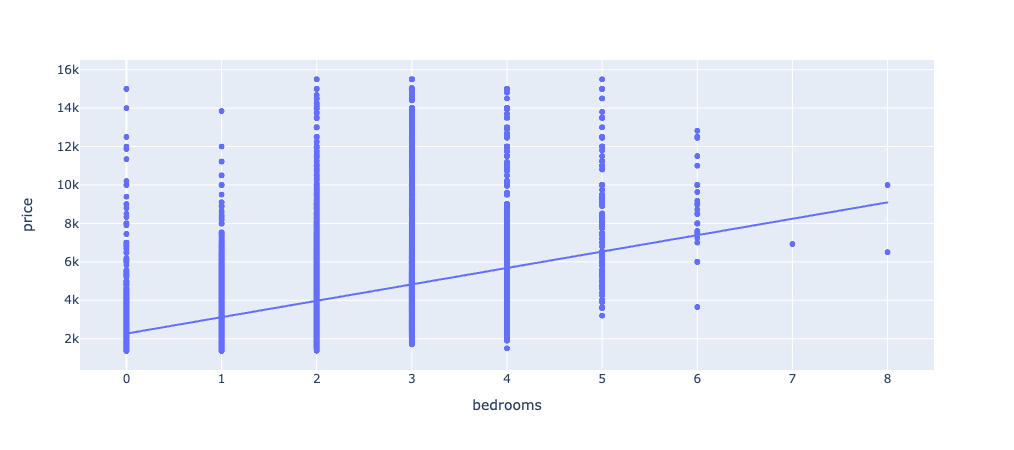

In [14]:
# OrdinaryLeastSquare
px.scatter(df, x='bedrooms', y='price', trendline='ols')

* There is no clear linear relationship. However among the existing features, it's one of the more linear ones to select from.

In [15]:
y = df["price"]
type(y)

pandas.core.series.Series

In [16]:
  lr = LinearRegression()

## Multi dimensional linear fit

In [17]:
def mylinear_train(mycol_list):
  """
  mycol_list["bedrooms", "bathrooms", ...]
  """
  X = df[mycol_list]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  lr.fit(X_train, y_train)
  print('Training MAE:', mean_absolute_error(y_train, lr.predict(X_train)))
  print('Testing MAE:', mean_absolute_error(y_test, lr.predict(X_test)))
  return lr

## Multi dimensional linear perdictor

In [28]:
def mypredict_rent(mydata_list):
    """
    mydata_list = [3, 1.5, ...]
    """
    mydata = np.array(mydata_list).reshape(-1,len(np.array(mydata_list)))
    y_pred = lr.predict(mydata)
    print("y_pred:", y_pred, y_pred.shape)
    estimate = y_pred[0]
    coefficient = lr.coef_
    print("coefficient:", lr.coef_, lr.coef_.shape)
    result = f'${estimate:,.0f} is estimated rent for {mydata_list}: '
    explanation = f' In this linear regression, coefficients are {coefficient}.'
    return result + "\n" + explanation



## One dimension linear fit

In [29]:
mylinear_train(["bedrooms"])

Training MAE: 974.1812125834184
Testing MAE: 980.2232040566545


LinearRegression()

In [30]:
mypredict_rent([2])

y_pred: [3971.57963407] (1,)
coefficient: [855.30531892] (1,)


'$3,972 is estimated rent for [2]: \n In this linear regression, coefficients are [855.30531892].'

## Two dimensions linear fit

In [31]:
mylinear_train(["bedrooms", "bathrooms"])

Training MAE: 820.7052924091687
Testing MAE: 825.4385472797375


LinearRegression()

In [32]:
mypredict_rent([3,1.5])

y_pred: [4768.12997621] (1,)
coefficient: [ 384.46668783 2112.1158617 ] (2,)


'$4,768 is estimated rent for [3, 1.5]: \n In this linear regression, coefficients are [ 384.46668783 2112.1158617 ].'

## Four dimensions linear fit

In [33]:
df["latitude"].mean()

40.750756430005325

In [34]:
mylinear_train(["bathrooms", "bedrooms", "latitude", "longitude"])

Training MAE: 741.8280340539152
Testing MAE: 743.3327588928548


LinearRegression()

In [35]:
mypredict_rent([1.5, 3, df["latitude"].mean(), df["longitude"].mean()])

y_pred: [4803.40692854] (1,)
coefficient: [  2039.80648422    423.54190228   1960.24564285 -16385.47886432] (4,)


'$4,803 is estimated rent for [1.5, 3, 40.750756430005325, -73.97275774509401]: \n In this linear regression, coefficients are [  2039.80648422    423.54190228   1960.24564285 -16385.47886432].'